---
title: Measuring text similarity with sentence embeddings
date: 2024-02-23
description: Using Sentence-Transformers to measure the distance between a concept and a text.
categories: [sentence embeddings]
draft: false
image: twins.webp
author-meta: Neal Caren, Associate Professor, Department of Sociology, University of North Carolina, Chapel Hill
---

In [2]:
pip install -U --q sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 200)


/Users/nealcaren/anaconda3/envs/whisperplus/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')

/Users/nealcaren/anaconda3/envs/whisperplus/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/nealcaren/anaconda3/envs/whisperplus/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [5]:
model.encode('We study apples.')

array([ 7.25412294e-02,  2.94132698e-02, -1.04851276e-02,  7.10855499e-02,
       -1.60725769e-02, -1.44585697e-02,  2.01909002e-02, -1.64043065e-02,
        5.85170425e-02,  4.42925990e-02,  3.38043720e-02, -3.70339900e-02,
       -1.01375952e-02,  1.51030989e-02, -2.33681127e-02, -7.01107532e-02,
       -6.28457516e-02, -1.98269282e-02, -2.56151836e-02, -3.29240002e-02,
       -3.28812934e-02,  1.20462896e-02,  2.59449407e-02, -9.30627715e-03,
        3.87127437e-02,  5.07903211e-02,  1.87327876e-03, -3.24000195e-02,
       -3.31559330e-02, -2.26897225e-02, -3.54236215e-02,  5.46763092e-02,
        9.66718495e-02,  3.60654816e-02, -5.42746857e-02, -6.75004860e-03,
        1.40686721e-01, -5.24841994e-02,  2.66690422e-02, -1.14018116e-02,
       -5.27682193e-02,  7.28323534e-02,  2.73659322e-02,  1.07277647e-01,
        1.61659811e-02,  3.81597877e-02, -1.69903729e-02, -3.23689356e-02,
        2.42316276e-02,  6.92270622e-02, -7.24644810e-02,  5.75410959e-04,
       -2.30131280e-02, -

In [6]:
len(model.encode('We study apples.'))

384

In [7]:
def concept_string_sim(concept, 
                       text
):
    concept_emedding = model.encode(concept)
    for word in text.split():
        word_embedding = model.encode(word)
        similarity = util.pytorch_cos_sim(concept_emedding, word_embedding)[0][0]
        print(f'Similarity between {word} and {concept} is {similarity:.2f}.')

    text_embedding = model.encode(text)
    similarity = util.pytorch_cos_sim(concept_emedding, text_embedding)[0][0]
    print(f'Similarity between {text} and {concept} is {similarity:.2f}.')


In [32]:
concept_string_sim('rock', 'Grateful Dead show')

Similarity between Grateful and rock is 0.21.
Similarity between Dead and rock is 0.40.
Similarity between show and rock is 0.34.
Similarity between Grateful Dead show and rock is 0.40.


In [9]:
concept_string_sim('thankful attitude', 'Grateful Dead show')

Similarity between Grateful and thankful attitude is 0.50.
Similarity between Dead and thankful attitude is 0.23.
Similarity between show and thankful attitude is 0.20.
Similarity between Grateful Dead show and thankful attitude is 0.20.


In [10]:
def string_string_sim(text1,
                      text2,
):
    text1_embedding = model.encode(text1)
    text2_embedding = model.encode(text2)

    similarity = util.pytorch_cos_sim(text1_embedding, text2_embedding)[0][0]
    print(f'Similarity is {similarity:.2f}.')

In [11]:
string_string_sim('We study revolutions.', 'This paper examines social movements.')

Similarity is 0.47.


In [12]:
string_string_sim('We study revolutions.', 'This paper examines health behaviors.')

Similarity is 0.18.


In [13]:
string_string_sim('We study revolutions.', 'This paper examines social movements in Algeria during the 1970s.')

Similarity is 0.36.


In [14]:
movement_word_list=['social movement', 'contentious politics', 'mobilization',]

movement_words = ', '.join(movement_word_list)

In [15]:
string_string_sim(movement_words,
                      'We study revolutions.',
)

Similarity is 0.44.


In [16]:
string_string_sim(movement_words,
                      'This paper examines health behaviors.',
)

Similarity is 0.18.


In [17]:
string_string_sim(movement_words,
                      'We study revolutions in Algeria.',
)

Similarity is 0.42.


In [18]:
abstract_moby = "Role exit is a complex process that can be especially complicated for extremists, whose identities are stigmatized. Such stigmatization often leads extremists to seek refuge in “free spaces” where they may insulate themselves from the mainstream and celebrate their ideology amongst likeminded individuals. Yet, stigma may also push those who desire to exit an extremist role to seek out their own free spaces where they can disengage from extremist ideology with others who wish to disengage. In this study, we analyze posts obtained from two Incel digital forums: a forum of active Incels and a forum of exiting Incels. We compared the ways that active and exiting Incels use free spaces to situate themselves inside or outside of this extremist community. Our analysis demonstrates that free spaces, which social movement scholars argue foster commitment among extremists, may offer exiting extremists insulation from active extremists while also keeping them tethered to hostile ideology."

string_string_sim(abstract_moby, movement_words)

Similarity is 0.36.


In [19]:
abstract_sf= '''All around the world, school-entry cohorts are organized on an annual calendar so that the age of students in the same cohort differs by up to one year. It is a well-established finding that this age gap entails a consequential (dis)advantage for academic performance referred to as the relative age effect (RAE). This study contributes to a recent strand of research that has turned to investigate the RAE on non-academic outcomes such as personality traits. An experimental setup is used to estimate the causal effect of monthly age on cognitive effort in a sample of 798 fifth-grade students enrolled in the Spanish educational system, characterized by strict enrolment rules. Participants performed three different real-effort tasks under three different incentive conditions: no rewards; material rewards; and material and status rewards. We observe that older students outwork their youngest peers by two-fifths of a standard deviation, but only when material rewards for performance are in place. Despite the previously reported higher taste for competition among the older students within a school-entry cohort, we do not find that the RAE on cognitive effort increases after inducing competition for peer recognition. Finally, the study also provides suggestive evidence of a larger RAE among boys and students from lower social strata. Implications for sociological research on educational inequality are discussed. To conclude, we outline policy recommendations such as implementing evaluation tools that nudge teachers toward being mindful of relative age differences.'''

string_string_sim(abstract_sf, movement_words)

Similarity is -0.04.


In [20]:
df = pd.read_json('https://raw.githubusercontent.com/nealcaren/notes/main/posts/abstracts/sociology-abstracts.json')

In [21]:
movement_word_embedding = model.encode(movement_words)

def string_embedding_sim(text1,
                      text2_embedding=movement_word_embedding,
):
    text1_embedding = model.encode(text1)

    similarity = util.pytorch_cos_sim(text1_embedding, text2_embedding)[0][0].item()
    return similarity

In [22]:
string_embedding_sim(abstract_moby )

0.36133891344070435

In [23]:
df['abstract_movement_similarity'] = df['Abstract'].apply(string_embedding_sim)

<Axes: >

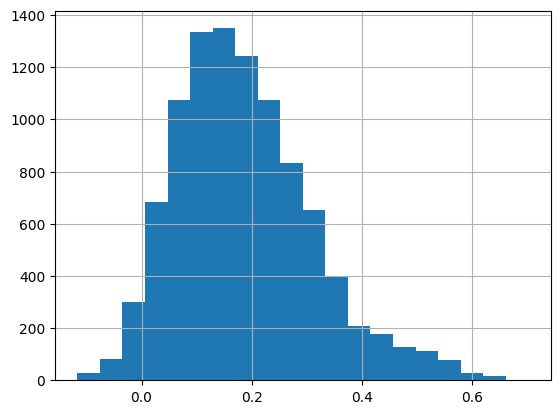

In [24]:
df['abstract_movement_similarity'].hist(bins=20)

In [25]:
# Step 1: Create quintiles
df['Quintile'] = pd.qcut(df['abstract_movement_similarity'], 20, labels=False)

# Step 2: Filter for the top quarter quintiles (quintiles 15-19)
top_half_quintiles = df[df['Quintile'] >= 15]

# Step 3: Display "Title" and "Source title" for a random sample of 5 rows within each top half quintile
for quintile in range(19, 14, -1):
    sample = top_half_quintiles[top_half_quintiles['Quintile'] == quintile].sample(n=5)
    print(f"Quintile {quintile + 1}:")
    display(sample[['Source title', 'Title', 'abstract_movement_similarity']])

Quintile 20:


,Source title,Title,abstract_movement_similarity
5749,Qualitative Sociology,Legitimacy without Mobilization? How Social Justice Organizations Defend their Democratic Credentials,0.500987
9191,Sociological Theory,"Modernity and the Politics of Newness: Unraveling New Time in the Chinese Cultural Revolution, 1966 to 1968",0.470191
7308,Qualitative Sociology,"Becoming a Population: Seeing the State, Being Seen by the State, and the Politics of Eviction in Cape Town",0.425383
871,Social Forces,Environmental threats and political opportunities: Citizen activism in the North Bohemian coal basin,0.482557
4489,Theory and Society,Combining transition studies and social movement theory: towards a new research agenda,0.631707


Quintile 19:


,Source title,Title,abstract_movement_similarity
9636,Social Problems,"""Trans Enough"": Examining the Boundaries of Transgender-Identity Membership",0.367395
1123,Mobilization,A field-experimental study of emergent mobilization in online collective action,0.419390
248,Mobilization,Com/passionate protests: Fighting the deportation of asylum seekers,0.423252
457,Du Bois Review,Taking postracialism seriously: From movement mythology to racial formation,0.400696
6373,Qualitative Sociology,Life on File: Archival Epistemology and Theory,0.365092


Quintile 18:


,Source title,Title,abstract_movement_similarity
4577,City and Community,Performative Progressiveness: Accounting for New Forms of Inequality in the Gayborhood,0.343400
8222,American Journal of Sociology,From the State to the Street: The Segregated Loss of Childcare and the Institutional Origins of Organizational Deprivation,0.327435
1172,Sociological Perspectives,Differences in Public Perceptions and Leaders Perceptions on Hydraulic Fracturing and Shale Development,0.314416
839,Theory and Society,"The theoretical costs of ignoring childhood: rethinking independence, insecurity, and inequality",0.334687
6857,Sociological Inquiry,"The Culture of White Space, the Racialized Production of Meaning, and the Jamband Scene",0.329481


Quintile 17:


,Source title,Title,abstract_movement_similarity
8118,Sociological Inquiry,Assessing Variation and Change in Newspaper Portrayals of Muslims: The influence of the Trump Election and Differences across the United States in Local and National Papers*,0.289904
8015,Sociological Forum,"Fill the Earth and Subdue It: Christian Nationalism, Ethno-Religious Threat, and Nationalist Pronatalism",0.292034
6354,Sociological Forum,"The Outsider’s Edge: Geography, Gender, and Sexuality in the Local Color Movement",0.291755
8028,Social Psychology Quarterly,Exchange and the Creation of Trust and Solidarity across Cultures,0.290860
1287,American Sociological Review,The Historical Demography of Racial Segregation,0.287827


Quintile 16:


,Source title,Title,abstract_movement_similarity
7416,Du Bois Review,"Zainichi Koreans, African Americans, and the Racial Politics of Comparison",0.280232
5654,Sociological Perspectives,Who Doesn’t Want Democracy? A Multilevel Analysis of Elite and Mass Attitudes,0.278912
6470,Symbolic Interaction,The Everyday Drama of Coproduction in Community Mental Health Services: Analyzing Welfare Workers' Performance as the “Undercover Agent”,0.270104
5474,Symbolic Interaction,“Jesus Would Turn the Tables Over”: Five Dimensions of Authenticity Applied to Countercultural Christianity,0.272482
424,City and Community,Territories of concern: Vacant housing and perceived disorder on three suburban blocks,0.272447


<Axes: ylabel='Source title'>

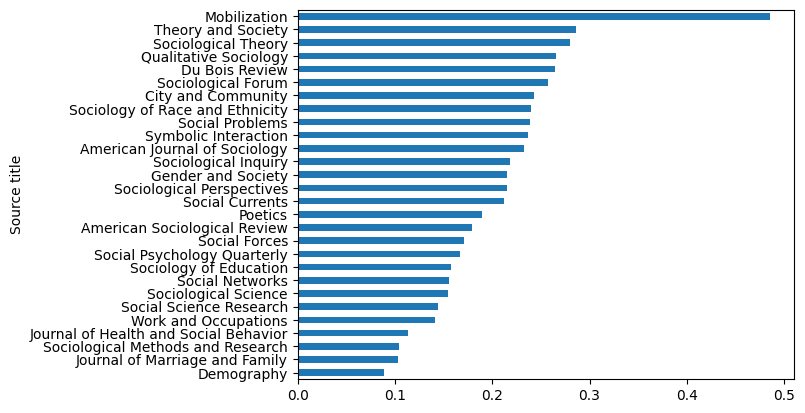

In [26]:
df.groupby('Source title')['abstract_movement_similarity'].mean().sort_values(ascending=True).plot(kind='barh')

In [27]:
# Group by 'Source Title' and find the index of the max 'abstract_movement_similarity' in each group
idx = df.groupby('Source title')['abstract_movement_similarity'].idxmax()

# Filter the DataFrame to keep only the rows with the highest 'abstract_movement_similarity' in each group
highest_values_df = df.loc[idx]
display = ['Source title', 'Title', 'abstract_movement_similarity']
highest_values_df[display].sort_values(by='abstract_movement_similarity', ascending=False)

,Source title,Title,abstract_movement_similarity
1923,Mobilization,Social movements in an age of participation,0.702846
433,American Journal of Sociology,"Issue bricolage: Explaining the configuration of the social movement sector, 1960–1995",0.680012
3768,Social Problems,Economic breakdown and collective action,0.660584
4400,Sociology of Race and Ethnicity,The Anti-oppressive Value of Critical Race Theory and Intersectionality in Social Movement Study,0.652746
5221,Social Currents,Assessing the Explanatory Power of Social Movement Theories across the Life Course of the Civil Rights Movement,0.641801
8064,Sociological Perspectives,Policy Relay: How Affirmative Consent Went from Controversy to Convention,0.632110
4489,Theory and Society,Combining transition studies and social movement theory: towards a new research agenda,0.631707
6325,Social Forces,Pathways to modes of movement participation: Micromobilization in the nashville civil rights movement,0.629331
2482,American Sociological Review,Tactical Innovation in Social Movements: The Effects of Peripheral and Multi-Issue Protest,0.616886
6201,City and Community,"Confronting Scale: A Strategy of Solidarity in Urban Social Movements, New York City and Beyond",0.606433


In [28]:

quantitative_words = ', '.join([
    "surveys",
    "experiments",
    "quasi-experiments",
    "regression analysis",
    "statistical analysis",
    "correlation",
])

quantitative_embedding = model.encode(quantitative_words)

In [29]:
df['abstract_quant_similarity'] = df['Abstract'].apply(string_embedding_sim, 
                                                       text2_embedding=quantitative_embedding)

<Axes: ylabel='Source title'>

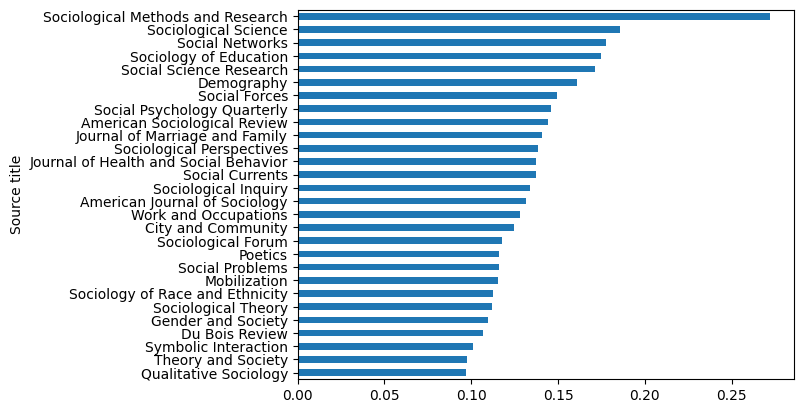

In [30]:
df.groupby('Source title')['abstract_quant_similarity'].mean().sort_values(ascending=True).plot(kind='barh')

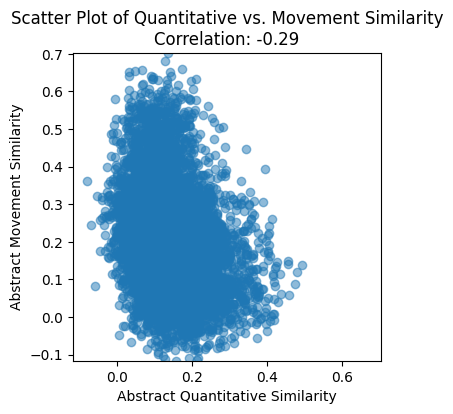

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# Calculate the Pearson correlation coefficient
correlation = df['abstract_quant_similarity'].corr(df['abstract_movement_similarity'])

# Determine the common range for both axes based on the min and max of both series
common_range = [
    min(df['abstract_quant_similarity'].min(), df['abstract_movement_similarity'].min()), 
    max(df['abstract_quant_similarity'].max(), df['abstract_movement_similarity'].max())
]

# Create the scatter plot with square dimensions
plt.figure(figsize=(4, 4))  # Makes the figure square in size
plt.scatter(df['abstract_quant_similarity'], df['abstract_movement_similarity'], alpha=0.5)

# Set the same range for both X and Y axes
plt.xlim(common_range)
plt.ylim(common_range)


# Add a title with the correlation coefficient, formatted to two decimal places
plt.title(f'Scatter Plot of Quantitative vs. Movement Similarity\nCorrelation: {correlation:.2f}')

# Add x and y labels
plt.xlabel('Abstract Quantitative Similarity')
plt.ylabel('Abstract Movement Similarity')

# Ensure the aspect ratio is equal to make the plot truly square
plt.gca().set_aspect('equal', adjustable='box')

plt.show()
